In [112]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "text.usetex":True,
    "font.family":"serif",
})

In [113]:
xlabel_kwargs = {'fontsize':15}
ylabel_kwargs = {'fontsize':15}
legend_kwargs = {'fontsize':12}
title_kwargs = {'fontsize':18}
xticks_kwargs = {'fontsize':12}
yticks_kwargs = {'fontsize':12}

In [114]:
cwd = os.getcwd()

esn_dname = cwd + '/saved_AR_AEESN_rnn/AR_ESN_ensemble_008'
gru_dname = cwd + '/saved_AR_AERNN_rnn/AR_rnn_007'

print('esn_dname : ', esn_dname)
print('gru_dname : ', gru_dname)

esn_dname :  /home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AEESN_rnn/AR_ESN_ensemble_008
gru_dname :  /home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_007


In [115]:
# plot_dir = cwd + '/study-01/plots'

# if not os.path.exists(plot_dir):
#     os.makedirs(plot_dir)

esn_plot_dir = esn_dname + '/plots/study-01'
if not os.path.exists(esn_plot_dir):
    os.makedirs(esn_plot_dir)
    
gru_plot_dir = gru_dname + '/plots/study-01'
if not os.path.exists(gru_plot_dir):
    os.makedirs(gru_plot_dir)

In [116]:
with open(esn_dname + '/plots/longterm--pdf--W1.txt', 'r') as f:
    s = f.readlines()

s

['num_outsteps_AR :  0, 15, 20, 25, 30\n',
 'x1 W1 : 8.6673E-01, 3.2654E-01, 3.2654E-01, 4.1550E-01, 4.1550E-01\n',
 'x2 W1 : 8.3294E-01, 6.1020E-01, 6.1020E-01, 9.4169E-01, 9.4169E-01\n',
 'x3 W1 : 2.7882E-01, 6.8123E-01, 6.8123E-01, 8.4681E-01, 8.4681E-01\n']

In [117]:
num_outsteps_esn = s[0].split(':')[1].strip().split(',')
num_outsteps_esn = [int(elem.strip()) for elem in num_outsteps_esn]
print('num_outsteps_esn : {}'.format(num_outsteps_esn))

W1_esn = []
for i in range(1, len(s)):
    temp_ = s[i].split(':')[1].strip().split(',')
    temp_ = [float(elem.strip()) for elem in temp_]
    print(temp_)
    W1_esn.append(temp_)

num_outsteps_esn : [0, 15, 20, 25, 30]
[0.86673, 0.32654, 0.32654, 0.4155, 0.4155]
[0.83294, 0.6102, 0.6102, 0.94169, 0.94169]
[0.27882, 0.68123, 0.68123, 0.84681, 0.84681]


In [118]:
with open(gru_dname + '/plots/longterm--pdf--W1.txt', 'r') as f:
    s = f.readlines()

s

['num_outsteps_AR :  0,  5, 10, 15, 20\n',
 'x1 W1 : 1.9558E+00, 1.1550E+00, 2.0193E+00, 1.9848E+00, 1.0672E+00\n',
 'x2 W1 : 1.9007E+00, 1.2022E+00, 2.2119E+00, 2.1773E+00, 1.1560E+00\n',
 'x3 W1 : 2.3335E-01, 2.2704E-01, 6.7833E-01, 6.2840E-01, 5.3480E-01\n']

In [119]:
num_outsteps_gru = s[0].split(':')[1].strip().split(',')
num_outsteps_gru = [int(elem.strip()) for elem in num_outsteps_gru]
print('num_outsteps_gru : {}'.format(num_outsteps_gru))

W1_gru = []
for i in range(1, len(s)):
    temp_ = s[i].split(':')[1].strip().split(',')
    temp_ = [float(elem.strip()) for elem in temp_]
    print(temp_)
    W1_gru.append(temp_)

num_outsteps_gru : [0, 5, 10, 15, 20]
[1.9558, 1.155, 2.0193, 1.9848, 1.0672]
[1.9007, 1.2022, 2.2119, 2.1773, 1.156]
[0.23335, 0.22704, 0.67833, 0.6284, 0.5348]


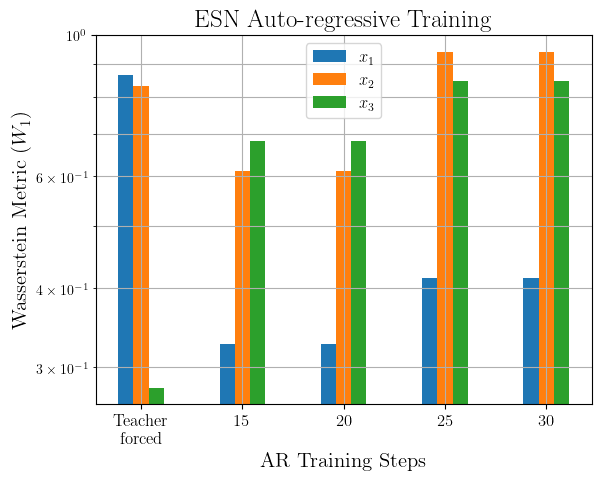

In [120]:
width = 0.15

labels = [r'$x_1$', r'$x_2$', r'$x_3$']
ind = np.arange(0, len(num_outsteps_esn))

for i in range(len(W1_esn)):
    plt.bar(
        ind+(i-int(0.5*len(W1_esn)))*width,
        W1_esn[i],
        label=labels[i],
        width=width
    )

plt.grid(True, which='both')
plt.legend(**legend_kwargs)

plt.ylabel(r'Wasserstein Metric ($W_1$)', **ylabel_kwargs)
plt.xlabel(r'AR Training Steps', **xlabel_kwargs)

xticks_pos = ind
xticks_labels = ['Teacher\nforced']
xticks_labels.extend(['{:d}'.format(elem) for elem in num_outsteps_esn[1:]])

plt.xticks(xticks_pos, xticks_labels, **legend_kwargs)

plt.gca().set_yscale('log')

plt.title(r'ESN Auto-regressive Training', **title_kwargs)

plt.savefig(esn_plot_dir+'/longterm--W1.pdf', dpi=300, bbox_inches='tight')
plt.show()

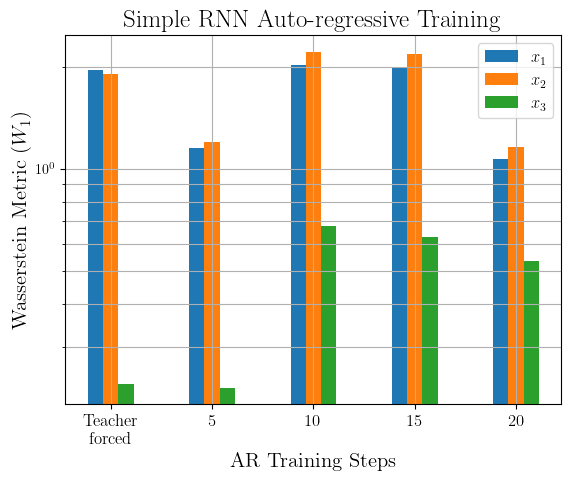

In [121]:
width = 0.15

labels = [r'$x_1$', r'$x_2$', r'$x_3$']
ind = np.arange(0, len(num_outsteps_gru))

for i in range(len(W1_gru)):
    plt.bar(
        ind+(i-int(0.5*len(W1_gru)))*width,
        W1_gru[i],
        label=labels[i],
        width=width
    )

plt.grid(True, which='both')
plt.legend(**legend_kwargs)

plt.ylabel(r'Wasserstein Metric ($W_1$)', **ylabel_kwargs)
plt.xlabel(r'AR Training Steps', **xlabel_kwargs)

xticks_pos = ind
xticks_labels = ['Teacher\nforced']
xticks_labels.extend(['{:d}'.format(elem) for elem in num_outsteps_gru[1:]])

plt.xticks(xticks_pos, xticks_labels, **legend_kwargs)

plt.gca().set_yscale('log')

plt.title(r'Simple RNN Auto-regressive Training', **title_kwargs)

plt.savefig(gru_plot_dir+'/longterm--W1.pdf', dpi=300, bbox_inches='tight')
plt.show()